# Logistic Regression

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_3308\1555725054.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.cost_history[epoch] = self.compute_cost(X_b, y)


Final parameters: 
[[0.095547  ]
 [0.86507582]]


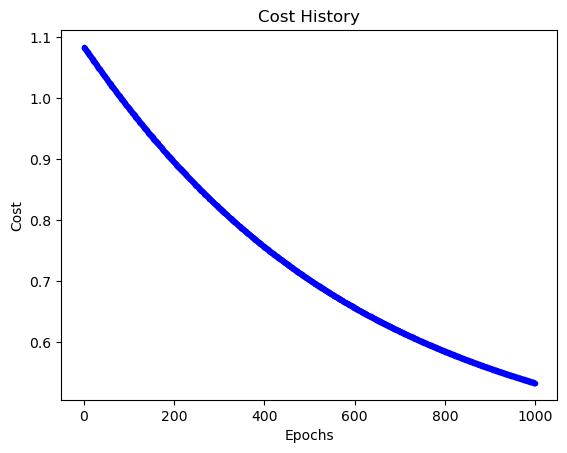

Predictions for X_new: 
[1 1 0]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(X.dot(self.theta))

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba >= 0.5).astype(int)

    def compute_cost(self, X, y):
        m = len(y)
        predictions = self.predict_proba(X)
        cost = (-1 / m) * (y.T.dot(np.log(predictions)) + (1 - y).T.dot(np.log(1 - predictions)))
        return cost

    def fit(self, X, y):
        m = len(y)
        X_b = np.c_[np.ones((m, 1)), X]  # Add a bias term (column of ones) to the input features
        self.theta = np.random.randn(X_b.shape[1], 1)  # Initialize weights

        self.cost_history = np.zeros(self.epochs)

        for epoch in range(self.epochs):
            gradients = (1 / m) * X_b.T.dot(self.predict_proba(X_b) - y)
            self.theta -= self.learning_rate * gradients
            self.cost_history[epoch] = self.compute_cost(X_b, y)

    def plot_cost_history(self):
        plt.plot(range(self.epochs), self.cost_history, 'b.')
        plt.xlabel('Epochs')
        plt.ylabel('Cost')
        plt.title('Cost History')
        plt.show()

    def get_params(self):
        return self.theta
# Generate some example data
np.random.seed(0)
X = 2 * np.random.rand(100, 1) - 1  # Random data between -1 and 1
y = (4 + 3 * X + np.random.randn(100, 1) > 4).astype(int)  # Generate labels

# Initialize and train the logistic regression model
log_reg_model = LogisticRegression(learning_rate=0.01, epochs=1000)
log_reg_model.fit(X, y)

# Print the final parameters
print(f"Final parameters: \n{log_reg_model.get_params()}")

# Plot the cost history
log_reg_model.plot_cost_history()

# Make predictions
X_new = np.array([[0], [2], [-2]])
X_new_b = np.c_[np.ones((3, 1)), X_new]  # Add a bias term
predictions = log_reg_model.predict(X_new_b)
print(f"Predictions for X_new: \n{predictions.flatten()}")
